<a href="https://colab.research.google.com/github/yuli-05/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos personales**
Nombre: **Julissa Dominguez Badillo**

Matricula: **1718110384**

Grupo: **IDGS91**

Materia: **Extracción de conocimientos de bases de datos**

# **Importar librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

#Metricas 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 

pd.options.display.max_columns = 9

# **Importar dataset**

In [2]:
df = pd.read_csv("titanic.csv")

# **Analizar dataframe**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [4]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# **Crear columna Feature Engine**

In [6]:
df['Male'] = df['Sex'] == 'male'

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [8]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [9]:
df['Male'].sum()

573

# **Scatter plot**

Text(0, 0.5, 'Age')

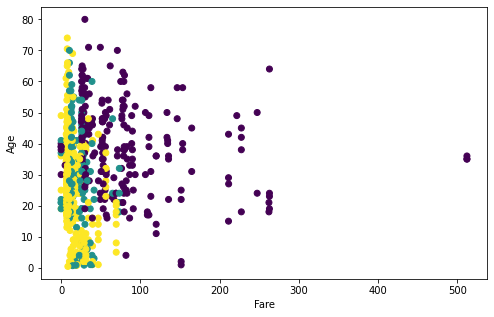

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Pclass'])
plt.xlabel("Fare")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

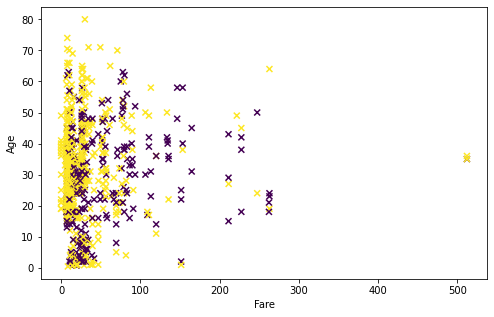

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Male'], marker="x")
plt.xlabel("Fare")
plt.ylabel("Age")

# **Separar caracteristicas y objetivo**

In [12]:
X = df[['Pclass','Age','Siblings/Spouses','Parents/Children','Fare','Male']].values
y = df['Survived'].values

In [14]:
X

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 7.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

In [16]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

# **Configurar el modelo**

In [17]:
model = LogisticRegression()

# **Dividir en train y test**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [19]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

# **Entrenar modelo**

In [20]:
model.fit(X_train, y_train)

LogisticRegression()

# **Predicciones**

In [21]:
y_pred = model.predict(X_test)

# **Analizar las predicciones**

In [22]:
X_test.shape

(178, 6)

In [23]:
X_test[0:7]

array([[3, 19.0, 0, 0, 7.8958, True],
       [3, 22.0, 0, 0, 7.8958, True],
       [1, 47.0, 1, 1, 52.5542, False],
       [2, 29.0, 0, 0, 10.5, True],
       [3, 18.0, 0, 0, 7.7958, True],
       [3, 39.0, 0, 0, 7.925, True],
       [3, 14.0, 5, 2, 46.9, True]], dtype=object)

In [24]:
y_test[0:7]

array([0, 0, 1, 0, 0, 0, 0])

In [25]:
y_pred[0:7]

array([0, 0, 1, 0, 0, 0, 0])

# **Probabilidad**

In [26]:
model.predict_proba(X_test)[:,0]

array([0.85750024, 0.87163322, 0.15653626, 0.74869022, 0.852539  ,
       0.93085628, 0.95608705, 0.18144388, 0.94066414, 0.07951965,
       0.89632751, 0.91037562, 0.29282373, 0.72591669, 0.48655704,
       0.87166001, 0.13670495, 0.71597703, 0.93827604, 0.75619016,
       0.23757079, 0.78363573, 0.35422468, 0.31831598, 0.34631028,
       0.33594669, 0.67204702, 0.27631627, 0.39880546, 0.64460037,
       0.89997666, 0.19615527, 0.1018199 , 0.1778387 , 0.2634761 ,
       0.90711203, 0.87159192, 0.87163322, 0.86739194, 0.6312331 ,
       0.90040994, 0.04206009, 0.07530612, 0.27048188, 0.93096021,
       0.90354336, 0.89383097, 0.88698135, 0.82783118, 0.91359925,
       0.9382899 , 0.88707112, 0.88599459, 0.47838612, 0.92273844,
       0.92427302, 0.65537161, 0.90371014, 0.06654667, 0.92723868,
       0.46961866, 0.03972561, 0.57490544, 0.43086134, 0.65618217,
       0.96340824, 0.98218192, 0.94499647, 0.17100465, 0.88459089,
       0.87607145, 0.16438261, 0.9000359 , 0.13081525, 0.85754

In [27]:
model.predict_proba(X_test)[:,1]

array([0.14249976, 0.12836678, 0.84346374, 0.25130978, 0.147461  ,
       0.06914372, 0.04391295, 0.81855612, 0.05933586, 0.92048035,
       0.10367249, 0.08962438, 0.70717627, 0.27408331, 0.51344296,
       0.12833999, 0.86329505, 0.28402297, 0.06172396, 0.24380984,
       0.76242921, 0.21636427, 0.64577532, 0.68168402, 0.65368972,
       0.66405331, 0.32795298, 0.72368373, 0.60119454, 0.35539963,
       0.10002334, 0.80384473, 0.8981801 , 0.8221613 , 0.7365239 ,
       0.09288797, 0.12840808, 0.12836678, 0.13260806, 0.3687669 ,
       0.09959006, 0.95793991, 0.92469388, 0.72951812, 0.06903979,
       0.09645664, 0.10616903, 0.11301865, 0.17216882, 0.08640075,
       0.0617101 , 0.11292888, 0.11400541, 0.52161388, 0.07726156,
       0.07572698, 0.34462839, 0.09628986, 0.93345333, 0.07276132,
       0.53038134, 0.96027439, 0.42509456, 0.56913866, 0.34381783,
       0.03659176, 0.01781808, 0.05500353, 0.82899535, 0.11540911,
       0.12392855, 0.83561739, 0.0999641 , 0.86918475, 0.14245

In [28]:
y_pred[:]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1])

In [29]:
y.shape

(887,)

Sobrevivientes

In [30]:
y.sum()

342

No Sobrevivientes

In [31]:
y.shape - y.sum()

array([545])

# **Métricas**

In [32]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,

In [33]:
(y_pred == y_test).sum()

145

In [34]:
y_test.shape

(178,)

In [35]:
accuracy = (y_pred == y_test).sum() / y_test.shape
accuracy

array([0.81460674])

# **Matriz de confusión**

In [36]:
confusion_matrix(y_test,y_pred)

array([[95, 15],
       [18, 50]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


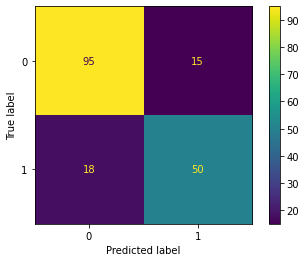

In [37]:
plot_confusion_matrix(model,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


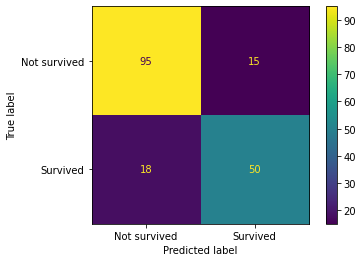

In [38]:
labels = ["Not survived", "Survived"]
plot_confusion_matrix(model,X_test,y_test, display_labels=labels)

In [39]:
labels = ["Not survived", "Survived"]
print(classification_report(y_test,y_pred, target_names=labels))

              precision    recall  f1-score   support

Not survived       0.84      0.86      0.85       110
    Survived       0.77      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# **Accuracy de la Confusión Matrix**
accuracy = suma de predicciones correctas / total de predicciones

In [40]:
accuracy = (95 + 50) / (95 + 50 + 15 +18)
accuracy

0.8146067415730337

# **Precisión**
¿Qué proporción de identificaciones positivas fue realmente correcta?

precision = positivos predichos / predicciones positivas

In [41]:
precision = 50 / (50 + 15)
precision

0.7692307692307693

# **Recall**
¿Qué proporcion de positivos reales se identifico correctamente?

recall = True positive / (True positive + False Negative)

In [42]:
recall = 50 / (50 +18)
recall

0.7352941176470589

# **F1 Score**
Es el promedio de precisión y recall

f1_score = 2 ((precision recall) / (precision + recall)

In [43]:
f1 = 2 * ((precision * recall) / (precision + recall))
f1

0.7518796992481205

# **SKLearn Metrics**

In [44]:
print("Accuracy: {} : {}".format(accuracy,accuracy_score(y_test,y_pred)))

Accuracy: 0.8146067415730337 : 0.8146067415730337


In [45]:
print("Precisión: {} : {}".format(precision,precision_score(y_test,y_pred)))

Precisión: 0.7692307692307693 : 0.7692307692307693


In [46]:
print("Recall: {} : {}".format(recall,recall_score(y_test,y_pred)))

Recall: 0.7352941176470589 : 0.7352941176470589


In [47]:
print("F1 Score: {} : {}".format(f1,f1_score(y_test,y_pred)))

F1 Score: 0.7518796992481205 : 0.7518796992481205


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# **Cambiar el umbral (Threshold)**

In [49]:
y_pred=model.predict_proba(X_test)[:,1] > 0.75

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       110
           1       0.97      0.47      0.63        68

    accuracy                           0.79       178
   macro avg       0.86      0.73      0.74       178
weighted avg       0.83      0.79      0.77       178



# **Conclusión**

Como conclusión al terminar esta actividad es que cada vez el manejo de los datos es muy importante.

En lo personal cada vez los actividades voy aprendiedo un poco más el manejo de los datos y son temas de suma importancias, que por consecuencia son un poco más complicados, pero aprendemos muchisimo.